In [55]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/raw/intern_data.csv', index_col=0)
Y_LABEL = 'y'
num_cols = ['a', 'b', 'd', 'e', 'f', 'g']
ctg_cols = ['c', 'h']
df

,a,b,c,d,e,f,g,h,y
7,0.951786,0.669570,green,0.170130,0.623469,0.925886,0.812685,white,3.707514
43,0.510447,0.922627,red,0.087899,0.025415,0.698444,0.658545,white,2.689243
47,0.294838,0.351081,yellow,0.710892,0.699661,0.545722,0.836863,black,2.886508
53,0.798645,0.572042,green,0.026137,0.609730,0.488668,0.342675,black,2.478168
54,0.689666,0.395323,red,0.172448,0.736433,0.708408,0.695521,white,3.182666
...,...,...,...,...,...,...,...,...,...
4889,0.195745,0.791511,green,0.784001,0.778692,0.407301,0.895939,white,3.646691
4910,0.995119,0.076542,yellow,0.326500,0.829949,0.500763,0.545784,white,3.270344
4920,0.091773,0.326965,green,0.922553,0.257745,0.348771,0.624851,white,2.672514
4931,0.761853,0.654755,blue,0.252334,0.128781,0.658069,0.405367,black,1.259850


In [11]:
df.isna().sum()

a    0
b    0
c    0
d    0
e    0
f    0
g    0
h    0
y    0
dtype: int64

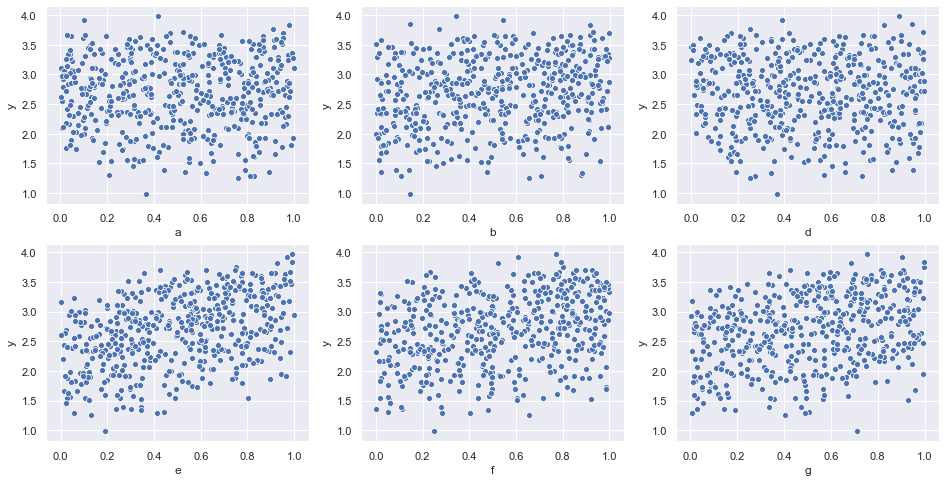

In [56]:
def plot_features_with_y(df_input):
    fig, axs = plt.subplots(2, 3, figsize=(16, 8))
    sns.set()
    for i in range(len(num_cols)):
        col_name = num_cols[i]
        ax = plt.subplot(2, 3, i + 1)
        #ax.set_title(col_name)
        sns.scatterplot(x=col_name, y=Y_LABEL, data=df_input)
    plt.show()
plot_features_with_y(df)

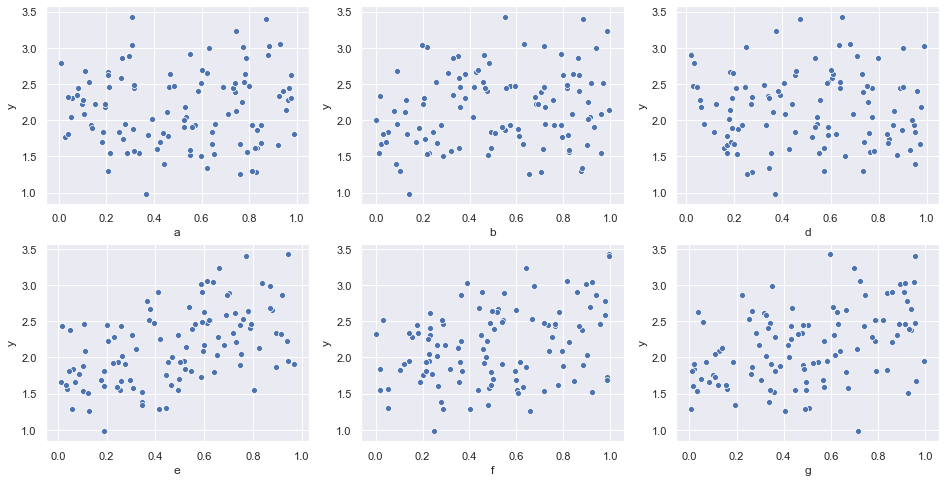

In [60]:
df_white = df[df['h'] == 'white']
df_black = df[df['h'] == 'black']
plot_features_with_y(df_black)

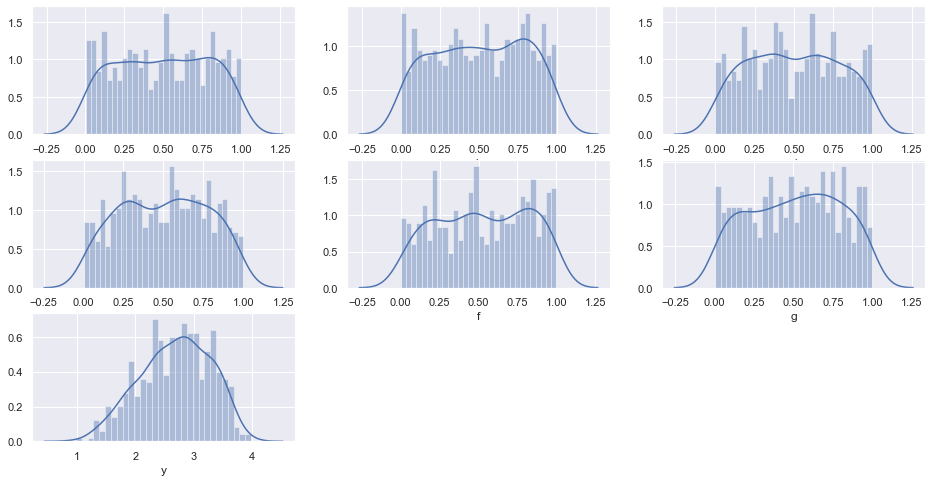

In [62]:
def plot_feature_dist(df_input):
    fig, axs = plt.subplots(3, 3, figsize=(16, 8))
    for i in range(len(num_cols)):
        col_name = num_cols[i]
        ax = plt.subplot(3, 3, i + 1)
        #ax.set_title(col_name)
        sns.distplot(df_input[col_name], bins=30, hist=True, label=col_name)
    ax = plt.subplot(3, 3, 7)
    sns.distplot(df_input[Y_LABEL], bins=30, hist=True, label=Y_LABEL)
    axs[2, 1].axis('off')
    axs[2, 2].axis('off')
    plt.show()
plot_feature_dist(df)

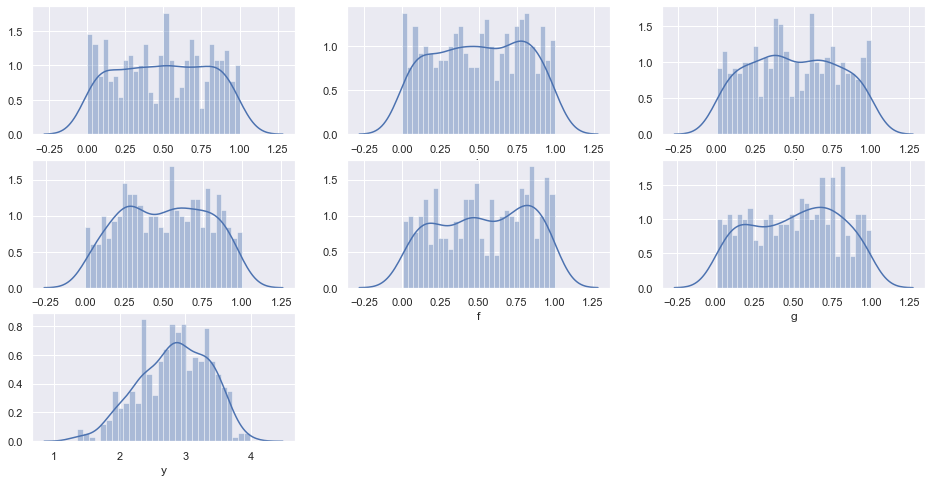

In [63]:
plot_feature_dist(df_white)

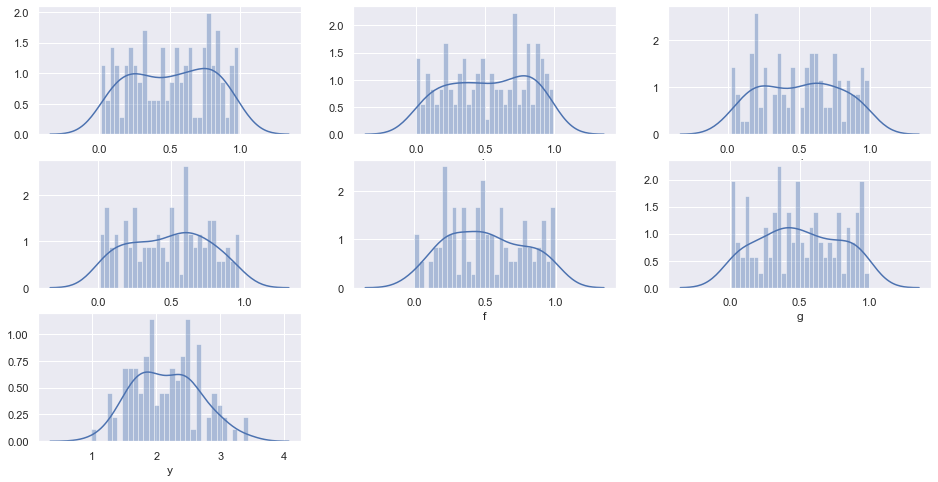

In [64]:
plot_feature_dist(df_black)

In [101]:
df_dummy = pd.get_dummies(df, columns=ctg_cols)
df_dummy

,a,b,d,e,f,g,y,c_blue,c_green,c_red,c_yellow,h_black,h_white
7,0.951786,0.669570,0.170130,0.623469,0.925886,0.812685,3.707514,0,1,0,0,0,1
43,0.510447,0.922627,0.087899,0.025415,0.698444,0.658545,2.689243,0,0,1,0,0,1
47,0.294838,0.351081,0.710892,0.699661,0.545722,0.836863,2.886508,0,0,0,1,1,0
53,0.798645,0.572042,0.026137,0.609730,0.488668,0.342675,2.478168,0,1,0,0,1,0
54,0.689666,0.395323,0.172448,0.736433,0.708408,0.695521,3.182666,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,0.195745,0.791511,0.784001,0.778692,0.407301,0.895939,3.646691,0,1,0,0,0,1
4910,0.995119,0.076542,0.326500,0.829949,0.500763,0.545784,3.270344,0,0,0,1,0,1
4920,0.091773,0.326965,0.922553,0.257745,0.348771,0.624851,2.672514,0,1,0,0,0,1
4931,0.761853,0.654755,0.252334,0.128781,0.658069,0.405367,1.259850,1,0,0,0,1,0


In [104]:
df_dummy['eh'] = df_dummy['e'] * df_dummy['h_white'] * df_dummy['c_blue'].map({0: 1, 1: 0})
df_dummy['eh2'] = df_dummy['e'] * (df_dummy['h_white'] + df_dummy['c_blue'].map({0: 1, 1: 0}))

df_dummy['f+g'] = (df_dummy['f'] + df_dummy['g']) * df_dummy['h_white'] * df_dummy['c_blue'].map({0: 1, 1: 0})
df_dummy['f+g2'] = (df_dummy['f'] + df_dummy['g']) * (df_dummy['h_white'] + df_dummy['c_blue'].map({0: 1, 1: 0}))

df_dummy['eh(f+g)'] = df_dummy['eh'] * df_dummy['f+g']
df_dummy['eh+f+g)'] = df_dummy['eh'] + df_dummy['f+g']

df_dummy

,a,b,d,e,f,g,y,c_blue,c_green,c_red,c_yellow,h_black,h_white,eh,f+g,eh(f+g),eh+f+g),eh2,f+g2
7,0.951786,0.669570,0.170130,0.623469,0.925886,0.812685,3.707514,0,1,0,0,0,1,0.623469,1.738571,1.083945,2.362040,1.246938,3.477142
43,0.510447,0.922627,0.087899,0.025415,0.698444,0.658545,2.689243,0,0,1,0,0,1,0.025415,1.356988,0.034488,1.382404,0.050831,2.713977
47,0.294838,0.351081,0.710892,0.699661,0.545722,0.836863,2.886508,0,0,0,1,1,0,0.000000,0.000000,0.000000,0.000000,0.699661,1.382585
53,0.798645,0.572042,0.026137,0.609730,0.488668,0.342675,2.478168,0,1,0,0,1,0,0.000000,0.000000,0.000000,0.000000,0.609730,0.831344
54,0.689666,0.395323,0.172448,0.736433,0.708408,0.695521,3.182666,0,0,1,0,0,1,0.736433,1.403930,1.033900,2.140363,1.472866,2.807860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,0.195745,0.791511,0.784001,0.778692,0.407301,0.895939,3.646691,0,1,0,0,0,1,0.778692,1.303240,1.014822,2.081932,1.557383,2.606481
4910,0.995119,0.076542,0.326500,0.829949,0.500763,0.545784,3.270344,0,0,0,1,0,1,0.829949,1.046547,0.868581,1.876496,1.659898,2.093094
4920,0.091773,0.326965,0.922553,0.257745,0.348771,0.624851,2.672514,0,1,0,0,0,1,0.257745,0.973623,0.250946,1.231368,0.515490,1.947245
4931,0.761853,0.654755,0.252334,0.128781,0.658069,0.405367,1.259850,1,0,0,0,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


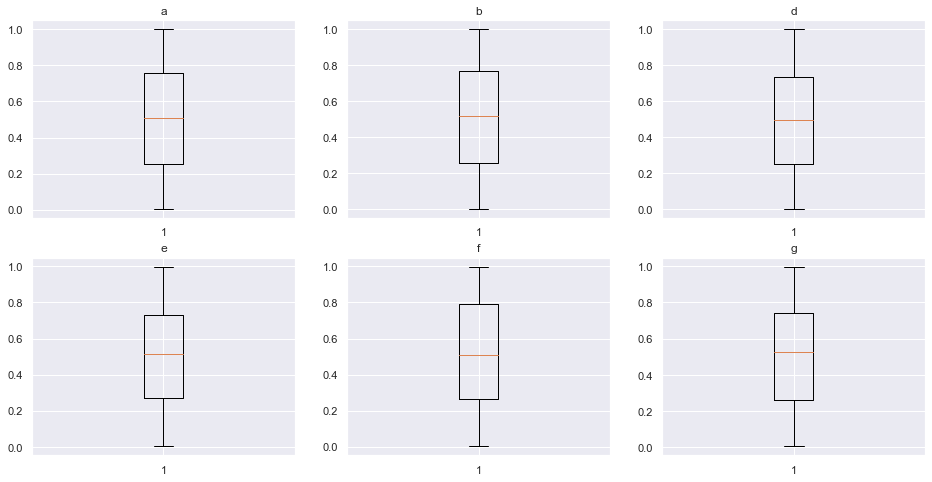

In [31]:
fig, axs = plt.subplots(2, 3, figsize=(16, 8))
for i in range(len(num_cols)):
    col_name = num_cols[i]
    ax = plt.subplot(2, 3, i + 1)
    ax.set_title(col_name)
    bp = ax.boxplot(df[col_name], 0, '', showfliers=True)
plt.show()

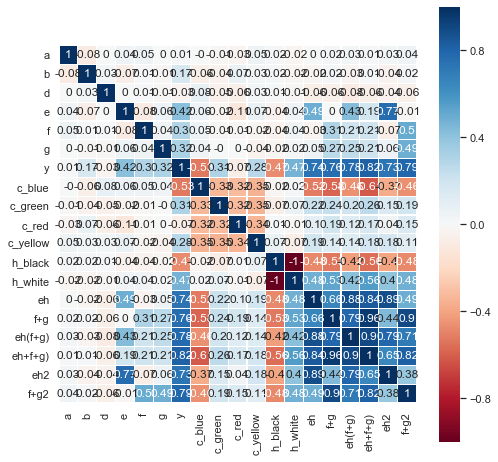

In [105]:
colormap = plt.cm.RdBu
f, axs = plt.subplots(1, 1, figsize=(8, 8))
#ax = plt.subplot(3, 3, idx + 1)
sns.heatmap(df_dummy.corr(method='pearson', min_periods=1).round(decimals=2), linewidths=0.1, vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)
#plt.xticks(rotation=30, fontsize=7)
plt.show()

[0.29761617 0.16165059 0.13091125 0.12500709 0.07197179 0.04824925
 0.04551351 0.04160589]


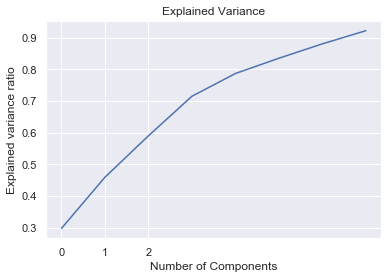

In [54]:
pca = PCA(n_components=8)
pca_result = pca.fit_transform(df_dummy)
print(pca.explained_variance_ratio_)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Explained variance ratio")
plt.title("Explained Variance")
plt.xticks(np.arange(0, 3, 1))
plt.show()